1. При фильтрации серии индексы остаются, а не пересоздаются.

2. Арифметические операции не распространяются на индексы

In [2]:
import pandas as pd

In [3]:
s2 = pd.Series([1, 2, 3, 4, 5, 6, 7])
s2[s2 > 4]

4    5
5    6
6    7
dtype: int64

In [7]:
s3 = s2[s2 > 4]
s3.index

Int64Index([4, 5, 6], dtype='int64')

In [9]:
s2 * 100

0    100
1    200
2    300
3    400
4    500
5    600
6    700
dtype: int64

In [10]:
d = {'a': 1, 'b': 2, 'c': 3}
'a' in d

True

In [14]:
s2 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
'a' in s2

True

In [15]:
d + d

TypeError: ignored

In [16]:
s2 + s2

a    2
b    4
c    6
dtype: int64

**Серию можно создавать не только на основе списка. Еще один распространённый сценарий это создание серии из словаря. В этом случае ключи словаря перейдут в индексы серии.**

In [18]:
d = {'Moscow': 1400, 'Murmansk': 900, 'Kazan': 200, 'Yakutsk': 400, 'Ufa': 300}
d

{'Kazan': 200, 'Moscow': 1400, 'Murmansk': 900, 'Ufa': 300, 'Yakutsk': 400}

In [20]:
s1 = pd.Series(d)
s1

Moscow      1400
Murmansk     900
Kazan        200
Yakutsk      400
Ufa          300
dtype: int64

In [21]:
s1['Kazan']

200

In [22]:
'Moscow' in s1

True

In [25]:
s3 = pd.Series([1400, 900, 200, 400, 300], index=d.keys())
s3

Moscow      1400
Murmansk     900
Kazan        200
Yakutsk      400
Ufa          300
dtype: int64

In [28]:
s1 == s3

Moscow      True
Murmansk    True
Kazan       True
Yakutsk     True
Ufa         True
dtype: bool

1. Вы можете задавать индексы на этапе создания серии

2. Не обязательно чтобы индексы шли по порядку

3. Если вы создаёте серию на основе словаря и указали индекс, которого не существует в словаре, то pandas добавит в серию такой индекс, но значение будет равно NaN (пропуск)

4. Если вы создаете серию на основе словаря и не передали все индексы, то никакой ошибки не будет. Пандас добавит в серию только те значения, которые вы указали в индексе

In [36]:
s2 = pd.Series(d, index=['Moscow', 'Ufa', 'Kazan', 'Murmansk', 'Yakutsk'])
s2

Moscow      1400
Ufa          300
Kazan        200
Murmansk     900
Yakutsk      400
dtype: int64

In [37]:
s3 = pd.Series(d, index=['Moscow', 'Ufa', 'Kazlan', 'Murmansk', 'Yakutsk'])
s3

Moscow      1400.0
Ufa          300.0
Kazlan         NaN
Murmansk     900.0
Yakutsk      400.0
dtype: float64

**NaN - Not a number**

In [40]:
s3[s3.isna()].index

Index(['Kazlan'], dtype='object')

In [42]:
s4 = pd.Series(d, index=['Moscow', 'Kazan'])
s4

Moscow    1400
Kazan      200
dtype: int64

**Кстати, помните мы проходили функции numpy any и all? Вы можете их применить сразу после функций isnull, notnull!**

s1.isnull().any()   <- вернет только одно значение, которое будет отвечать на главный вопрос: а есть ли в серии пропуски? 

s1.notnull().all() <- ответит на вопрос: а все ли значения в серии заполнены?

In [49]:
s5 = pd.Series(d, index=['Moscow', 'Vladivostok'])
s5

Moscow         1400.0
Vladivostok       NaN
dtype: float64

In [52]:
res = pd.isnull(s3)
res

Moscow      False
Ufa         False
Kazlan       True
Murmansk    False
Yakutsk     False
dtype: bool

In [56]:
pd.notnull(s3)

(Moscow       True
 Ufa          True
 Kazlan      False
 Murmansk     True
 Yakutsk      True
 dtype: bool, Moscow      1400.0
 Ufa          300.0
 Murmansk     900.0
 Yakutsk      400.0
 dtype: float64)

In [57]:
s3[pd.notnull(s3)]

Moscow      1400.0
Ufa          300.0
Murmansk     900.0
Yakutsk      400.0
dtype: float64

**Важно запомнить, что при сложении серий:**
1. не обязательно чтобы они были одинаковой длины

2. сложение будет происходить по индексам

3. если в одной из серий есть индекс, которого нет в другой серии, то индекс добавляется в результирующую серию, но значение присваивается NaN

In [59]:
import numpy as np

m1 = np.array([1, 2, 3])
m2 = np.array([4, 5, 6])
m1 + m2

array([5, 7, 9])

In [65]:
s1['Elista'] = 150
s1

Moscow      1400
Murmansk     900
Kazan        200
Yakutsk      400
Ufa          300
Elista       150
dtype: int64

In [66]:
s2['Обнинск'] = np.NaN 
s2

Moscow      1400.0
Ufa          300.0
Kazan        200.0
Murmansk     900.0
Yakutsk      400.0
Обнинск        NaN
dtype: float64

In [67]:
s1 + s2

Elista         NaN
Kazan        400.0
Moscow      2800.0
Murmansk    1800.0
Ufa          600.0
Yakutsk      800.0
Обнинск        NaN
dtype: float64

In [68]:
s1 - s2

Elista      NaN
Kazan       0.0
Moscow      0.0
Murmansk    0.0
Ufa         0.0
Yakutsk     0.0
Обнинск     NaN
dtype: float64

In [69]:
s1 = pd.Series([-1, 2, 3, -5])
s1

0   -1
1    2
2    3
3   -5
dtype: int64

In [74]:
s1.values

array([-1,  2,  3, -5])

In [75]:
s1.index

RangeIndex(start=0, stop=4, step=1)

In [76]:
s1.index = ['a', 'b', 'c', 'd']
s1

a   -1
b    2
c    3
d   -5
dtype: int64

In [77]:
s2 = pd.Series(np.arange(20, 31, 1))

0     20
1     21
2     22
3     23
4     24
5     25
6     26
7     27
8     28
9     29
10    30
dtype: int64

In [78]:
s2.index = [chr(x) for x in range(ord('a'), ord('a') + 11)]
s2

a    20
b    21
c    22
d    23
e    24
f    25
g    26
h    27
i    28
j    29
k    30
dtype: int64

**У каждой серии есть своё имя. Задать или прочитать имя можно через свойство name. Имя используется при работе с хранилищем серий - DataFrame.**



In [79]:
[s1, s1]

[a   -1
 b    2
 c    3
 d   -5
 dtype: int64, a   -1
 b    2
 c    3
 d   -5
 dtype: int64]

In [81]:
d = {'col1': s1, 'col2': s1}
d

{'col1': a   -1
 b    2
 c    3
 d   -5
 dtype: int64, 'col2': a   -1
 b    2
 c    3
 d   -5
 dtype: int64}

In [88]:
s1.name = 'values'
s1

a   -1
b    2
c    3
d   -5
Name: values, dtype: int64

In [90]:
s2 = pd.Series(np.arange(4))
s2

0    0
1    1
2    2
3    3
dtype: int64

In [93]:
s1.index.name = 'id'
s1

id
a   -1
b    2
c    3
d   -5
Name: values, dtype: int64

**На вход функции подаётся серия из 7 значений. Известно, что она хранит количество посещенных сайтов некоторого пользователя за первую неделю:**

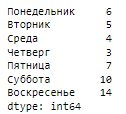

Известно, что за вторую неделю пользователь посетил в два раза больше сайтов



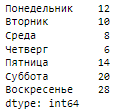

Определите сколько сайтов посетил пользователь в сумме за две недели в разрезе по дням недели. Функция должна вернуть только те дни, где количество посещенных сайтов больше 20:



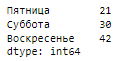

In [94]:
import pandas as pd

def solution(s1):
    ser = 3 * s1
    return ser[ser > 20]


**На вход поступает некоторая серия. Проверьте, есть ли в ней значение по индексу 'Пятница'. Верните True если есть иначе False.**

In [108]:
import pandas as pd

def solution(ser1):
    result = ser1['Пятница'] != np.NaN
    return result

In [109]:
s1['d'] = np.NaN
s1['d'] != np.NaN

True